In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CollegeRookieStatLog2.csv')
df.head()

,Unnamed: 0,Name,School,G,GS,MP,FG,FGA,FG%,2P,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,...,3.2,-5.93,1990,SF,22,0.4,0.3,0.2,0.2,1.3
1,1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,...,14.6,0.74,1996,PF,24,5.6,0.6,0.4,0.2,6.3
2,2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,...,2.9,-7.38,1998,SG,22,0.7,0.0,0.1,0.1,2.7
3,3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,...,5.2,-7.20,2000,SF,23,2.7,0.5,0.7,0.4,7.0
4,4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,...,15.8,11.13,2002,PG,20,2.8,3.7,1.5,0.2,10.9


In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990,SF,22,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996,PF,24,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998,SG,22,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000,SF,23,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002,PG,20,2.8,3.7,1.5,0.2,10.9


In [6]:
dfend = pd.read_csv('2019DraftClass.csv')
dfend.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
0,Bryce Aiken,Harvard,58,34,29.4,5.0,12.4,0.406,2.9,6.1,...,0.4,2.1,2.4,2.8,0.8,0.0,2.8,1.9,16.8,-1.09
1,Nickeil Alexander-Walker,Virginia Tech,67,67,29.9,4.7,10.1,0.464,3.0,5.6,...,0.6,3.4,4.0,2.7,1.4,0.5,2.2,1.9,13.5,7.25
2,Al-Wajid Aminu,North Florida,34,26,26.0,3.6,6.7,0.542,3.4,5.9,...,2.6,3.8,6.5,0.7,0.4,1.1,2.1,3.6,9.1,-1.65
3,Desmond Bane,TCU,109,82,28.7,4.2,8.2,0.516,2.8,4.8,...,0.8,3.4,4.2,1.9,0.8,0.3,1.3,2.2,11.5,10.08
4,RJ Barrett,Duke,38,38,35.3,8.4,18.5,0.454,6.5,12.2,...,1.6,6.0,7.6,4.3,0.9,0.4,3.2,1.8,22.6,11.97


In [7]:
dfend['Year'] = 2020
df = df.drop(['Pos','Age','NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS'], axis=1)
df1 = df.append(dfend, ignore_index = True)
df1 = df1[df1['Year']>2000]
df1.tail()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,Year
972,Kris Wilkes,UCLA,66.0,65.0,30.8,5.5,12.6,0.436,3.6,7.1,...,3.6,4.8,1.7,0.7,0.5,1.6,2.3,15.5,6.82,2020
973,Emmitt Williams,LSU,34.0,8.0,19.7,2.6,4.3,0.614,2.6,4.1,...,2.8,5.4,0.4,0.3,0.6,1.1,1.9,7.0,9.15,2020
974,Grant Williams,Tennessee,104.0,101.0,28.9,5.3,10.2,0.516,5.0,9.2,...,4.0,6.5,2.1,0.9,1.5,2.1,3.2,15.7,10.15,2020
975,Zion Williamson,Duke,33.0,33.0,30.0,9.0,13.2,0.680,8.2,11.0,...,5.4,8.9,2.1,2.1,1.8,2.4,2.1,22.6,11.97,2020
976,Kenny Wooten,Oregon,70.0,38.0,21.8,2.6,4.1,0.634,2.6,4.1,...,3.3,4.7,0.5,0.5,2.4,1.1,2.6,6.4,5.49,2020


In [9]:
df1.columns

Index(['Name', 'School', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA',
       '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'Year'],
      dtype='object')

In [10]:
plt.rcParams.update({'font.size': 14})

In [12]:
# Points Trend

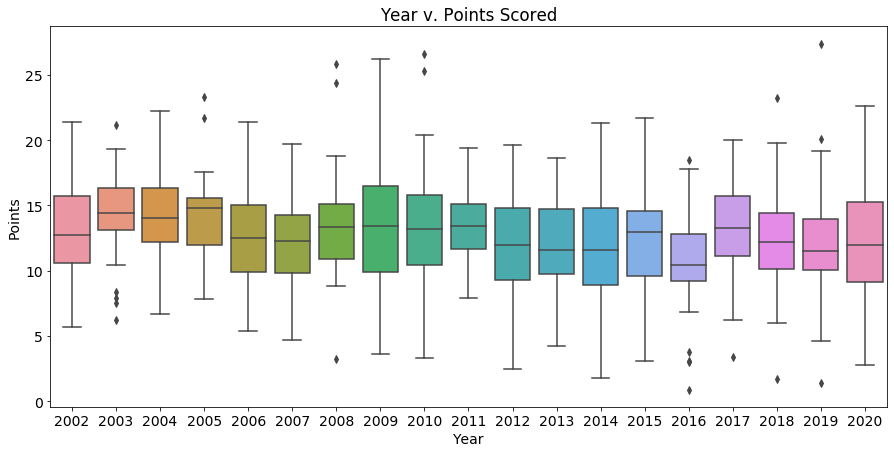

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Year v. Points Scored')
seaborn.boxplot(df1['Year'], df1['PTS'], ax=ax)
plt.xlabel('Year')
plt.ylabel('Points')
plt.show()

In [14]:
# Assists Trend

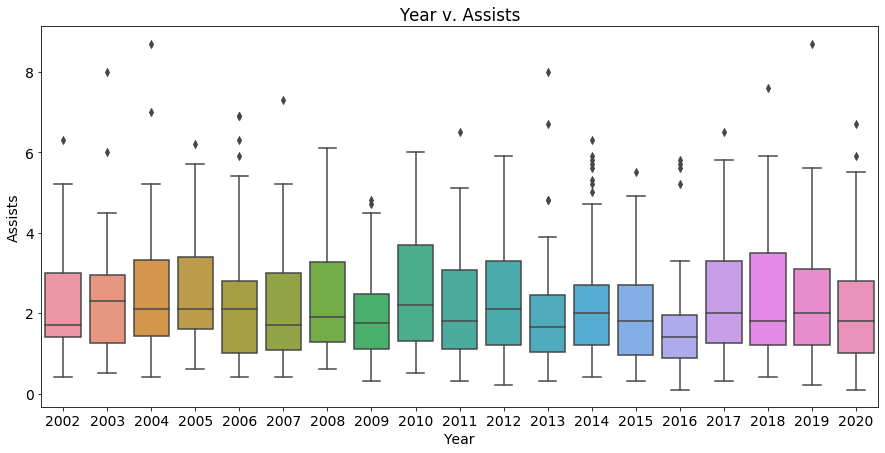

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Year v. Assists')
seaborn.boxplot(df1['Year'], df1['AST'], ax=ax)
plt.xlabel('Year')
plt.ylabel('Assists')
plt.show()

In [17]:
# Rebounds Trend

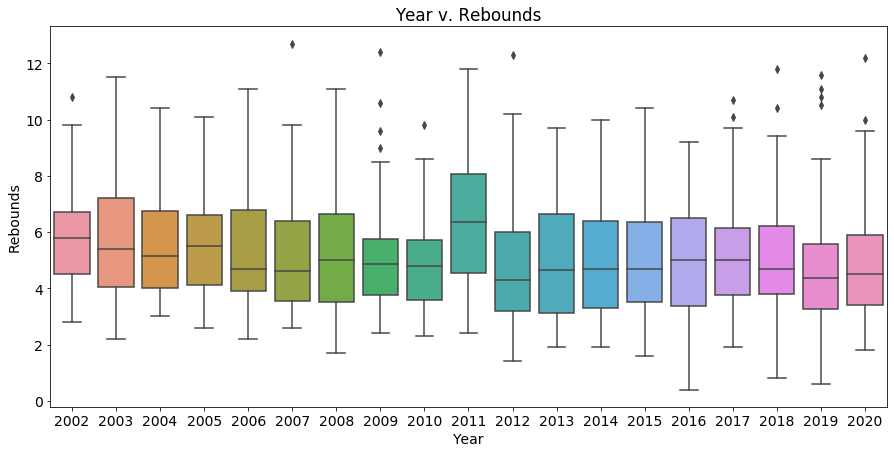

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Year v. Rebounds')
seaborn.boxplot(df1['Year'], df1['TRB'], ax=ax)
plt.xlabel('Year')
plt.ylabel('Rebounds')
plt.show()

In [20]:
# 3 Point:2 Point Attempt Ratio

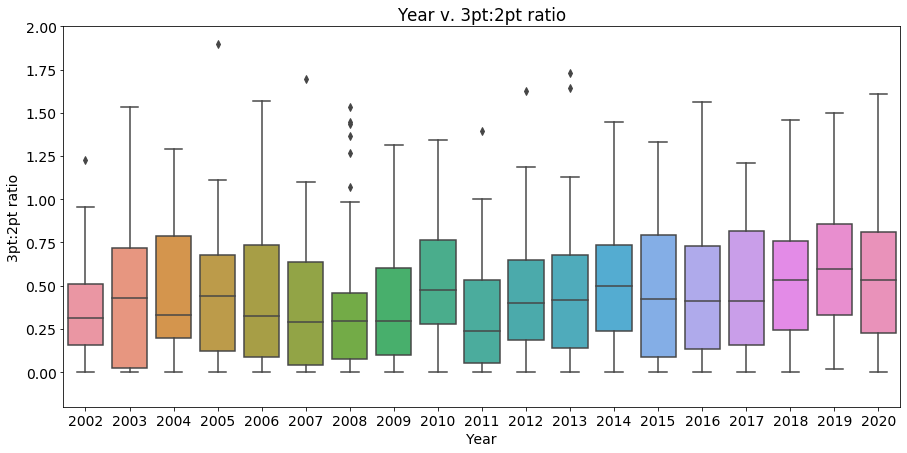

In [22]:
df1['ratio'] = df1['3PA']/df1['2PA']
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Year v. 3pt:2pt ratio')
plt.ylim(-.2, 2) 
seaborn.boxplot(df1['Year'], df1['ratio'], ax=ax)
plt.xlabel('Year')
plt.ylabel('3pt:2pt ratio')
plt.show()

In [23]:
# NBA Rookie Trends

In [24]:
df2 = pd.read_csv('NBARookieData.csv')

FileNotFoundError: [Errno 2] File b'NBARookieData.csv' does not exist: b'NBARookieData.csv'